#Multi label Image Classification Pipeline


Multilabel image classifier allows us to identify multiple objects of interest in a give image. For instance, in the following image we can see that we have all of green, yellow and red peppers:

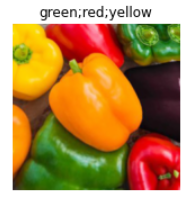

Each of identifiable objects in the image is represented by the label that was provided in the dataset for the model to learn on. The dataset is organized as csv file that normally contains the information about images (x) and labels (y) associated with each image.

## Let's install all libraries & dependencies that we need

In [1]:
!pip install -Uqq fastbook
!pip install -Uqq unpackai

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 12.2 MB/s 
     |████████████████████████████████| 46 kB 2.8 MB/s 
     |████████████████████████████████| 1.2 MB 43.8 MB/s 
     |████████████████████████████████| 189 kB 51.1 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 309 kB/s 
     |████████████████████████████████| 70 kB 5.2 MB/s 
     |████████████████████████████████| 91 kB 9.9 MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *

We will create the folder on the Google Drive to organize the dataset inside.

In [5]:
path = Path("/content/gdrive/MyDrive/Datasets/")

## Outline:
In this notebook we will do the following:  
1. Build a dataset, i.e. collect images and label them with classes. 
2. Prepare the dataset for the model (a.k.a. prepare the `dataloaders`)
3. Build the model and train it
4. Evaluate the model
5. Predict from new images

For sections 1, 2, and 3 you have two options:
1. The **Image-scraping-and-labeling method** optimized by Ray Zhang at unpackAI. This allows you to build a dataset from images you search and download from internet.
2. The **Own-labeling-technique**, when you have already images and just need to label them. In this case, the first step will be to upload all your images to your Google Drive so that the notebook running on colab can access them. 


## Image-scraping-labeling method

### Scrape images of the internet

In order to collect and design your own dataset we provide you with the scraping tool below.

**DuckDuckGo Image Scraper** - Scrape and Collect images via a search engine from the web.

In order to collect your images we will be utilizing **DuckDuckGo**. DuckDuckGo is an internet search engine that emphasizes protecting searchers' privacy and avoiding the filter bubble of personalized search results.

The below is a slightly modified version of the notebook by [Jew Dockrill](https://joedockrill.github.io/jmd_imagescraper/). Many thanks to him for the notebook and the package he wrote.

> Note: When using a Web Search Engine to download your pictures, there's no way to be sure exactly what images a search like this will find. The results can change over time. We've heard of at least one case of a community member who found some unpleasant pictures in their search results. You'll receive whatever images are found by the web search engine. If you're running this at work, or with kids, etc, then be cautious before you display the downloaded images.

##### Install & import `DuckDuckGoImageScraper` specific packages

> In order to run our scraper we have to import additional packages.

In [6]:
!pip install -q jmd_imagescraper
from jmd_imagescraper.imagecleaner import *
from jmd_imagescraper.core import *
from unpackai.utils import clean_error_img

Below we define the 2 variables:

1. `number_images_to_download`: The number of images you download per defined class. This can go up to 477 at the time of writing.
1. `duckduckgo_search`: Here we define our **classes** (i.e. mask_on, mask_off) and your **search term** (i.e. person with a medical mask, real person faces).

In [7]:
number_images_to_download = 20
duckduckgo_search(path, "peppers", "bell peppers", max_results=number_images_to_download)

Duckduckgo search: bell peppers


[Path('/content/gdrive/MyDrive/Datasets/peppers/001_6514f9aa.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/002_429ade6e.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/003_f74405fb.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/004_83259811.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/005_d9c8c3d2.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/006_94e2d18e.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/007_6e4efd2f.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/008_a428fb2b.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/009_38e0e16a.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/010_7d3121ef.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/011_ff4691b3.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/012_7c49a501.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/013_45bfdd25.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/014_2cdc7d91.jpg'),
 Path('/content/gdrive/MyDrive/Datasets/peppers/

We have now downloaded all the images into a folder that we specified and named it `path`. Lets check the destination folder of our images.

In [70]:
path

Path('/content/gdrive/MyDrive/Datasets')

With the command below we can check that we now have 1 subfolder for each class.

In [71]:
path.ls()

['peppers', 'unpackai_multi.json']

Sometimes, especially in real life projects, erronous image is a frequently occuring thing. We can fix the problem by checking each subfolder, and deleting all of the pictures that can not be open properly.

In [72]:
clean_error_img(path)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

You can use this to get delete images that are not suitable to either class.

In [73]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

### Label your scraped images

Use this to provide labels to the images that you just scraped. You can add as many labels as you want. **Once you have finished labelling all your data make sure to save your data as a csv file**.

In [74]:
from unpackai.turk.image import MultiClassImageLabeler

In [75]:
labeler = MultiClassImageLabeler(path)
labeler(["red","green","yellow"])

load from progress /content/gdrive/MyDrive/Datasets/unpackai_multi.json


  0%|          | 0/20 [00:00<?, ?it/s]

Output()

In case you don't change the path, you can find  './progress.csv' in the root directory of your session disk.
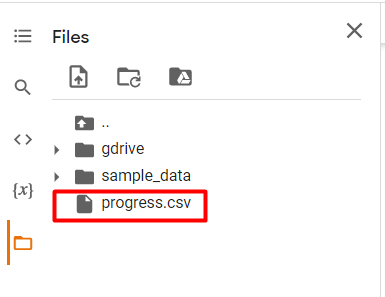

### Prepare data for the model

In [76]:
MultiClassImageLabeler.gety_from_csv("/content/progress.csv")

All possible labels:	['red', 'yellow', 'green']


<function unpackai.turk.image.MultiClassImageLabeler.gety_from_csv.<locals>.get_y>

In [77]:
dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=labeler.get_y,
    item_tfms=Resize(128))

dblock = dblock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dblock.dataloaders(path, bs=6)

Creating dataset with 20 labels


View a batch of data

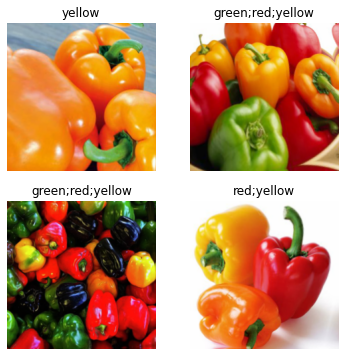

In [78]:
dls.show_batch(max_n=4)

### Build and train your model

In [40]:
learn = cnn_learner(dls, resnet18, metrics=accuracy_multi)

In [41]:
lr = learn.lr_find(show_plot=False)
learn.fine_tune(8, base_lr=lr.valley, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,1.003359,1.020570,0.500000,00:00
1,0.902694,0.902213,0.583333,00:00
2,0.859452,0.720660,0.583333,00:00


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.595215,0.695085,0.666667,00:00
1,0.622078,0.674809,0.750000,00:00
2,0.552921,0.746472,0.666667,00:00
3,0.514525,0.788322,0.666667,00:00
4,0.462875,0.819020,0.666667,00:00
5,0.417331,0.869121,0.750000,00:00
6,0.373272,0.878997,0.750000,00:00
7,0.378249,0.891597,0.750000,00:00


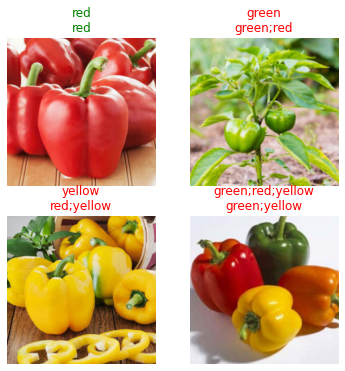

In [42]:
learn.show_results()

## 2. Technique and code when you label your own images.

> ⚠ NOTE ⚠
>
> if you have scrapped your images and labeled them with the code in the previous section, **skip this section and do not run it.**

When you already have a set of images, you just need to label them. You can use the method your prefer to label these images. After thatm you create a CSV file with the format indicated below and follow the steps below.



### CSV Image Dataset. 
 

CSV (Comma-separated values) is a file type that is similar to your excel file. In order to create your own CSV file you will have to:

1. Add all your images to the Google Drive.
2. Create a CSV file with two columns. 
    - Column 1 should contain each path to each individual image. This columns should have a header 'path'
    - Column 2 should contain the respective labels. Both columns should have headers. This columns should have a header 'label'
    
See the example below:

- In Excel or in a pandas DataFrame, the CSV file will look like this: 

|path | label | 
|:--- | :--- |
| /content/images/peppers/001_6514f9aa.jpg |red,green,yellow|
|/content/images/peppers/002_429ade6e.jpg| red,green|
|/content/images/peppers/003_f74405fb.jpg | red|
|... | ...|

- The row CSV file opened as a text file looks like this:

```ASCII
            path,label
            /content/gdrive/MyDrive/Datasets/peppers/001_6514f9aa.jpg,"red,green,yellow"
            /content/gdrive/MyDrive/Datasets/peppers/002_429ade6e.jpg,"red,green"
            /content/gdrive/MyDrive/Datasets/peppers/003_f74405fb.jpg,red
```

**!!! IMPORTANT. Labeling Requirements**

* Upload your CSV file to Google Drive.
* Labels in CSV file have to be a string separated by  ", " and all lower-cased. 
* When loading labels, the function will print out all the possible category, when you can see ```["red", "green", "gren", "yellow"]``` you might discover a typo, that can be fixed. 

When your dataset is organized, you also need to provide the path to the directory where your images are stored as well as the path to the csv file.

In [85]:
path_to_imgs = '/content/gdrive/MyDrive/Datasets/peppers'
path_to_csv = "/content/progress.csv"

### Prepare data for the model

Then we create a function `get_y` that returns the label(s) for each image. It is generated by the `MultiClassImageLabeler` tool.

In [86]:
get_y = MultiClassImageLabeler.gety_from_csv(path_to_csv)

All possible labels:	['red', 'yellow', 'green']


In [87]:
dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_y,
    item_tfms=Resize(128))

dblock = dblock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dblock.dataloaders(path, bs=6)

View a batch of data

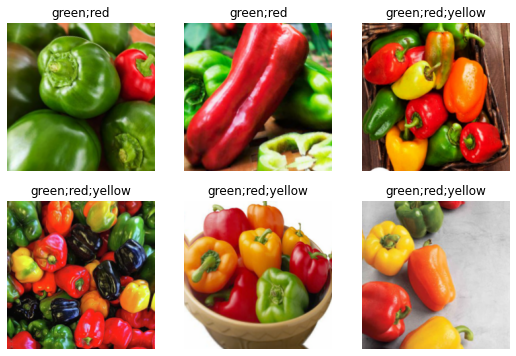

In [88]:
dls.show_batch()

### Build and train your model

In [89]:
learn = cnn_learner(dls, resnet18, metrics=accuracy_multi)

In [90]:
lr = learn.lr_find(show_plot=False)
learn.fine_tune(8, base_lr=lr.valley, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.863337,0.981798,0.500000,00:00
1,0.742054,0.855499,0.500000,00:00
2,0.739466,0.790982,0.666667,00:00


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.667684,0.728439,0.666667,00:00
1,0.587355,0.717227,0.666667,00:00
2,0.506716,0.742721,0.583333,00:00
3,0.480479,0.798211,0.666667,00:00
4,0.474941,0.815470,0.666667,00:00
5,0.448091,0.807505,0.750000,00:00
6,0.473177,0.823496,0.666667,00:00
7,0.437460,0.787144,0.666667,00:00


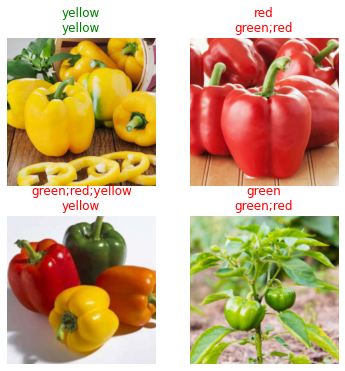

In [91]:
learn.show_results()

## Review the trained model performances

After you trained the model (any of the two methods above), it is time to get a sense of the performances.

In [142]:
interp = ClassificationInterpretation.from_learner(learn)

,target,predicted,probabilities,loss
0,green;red;yellow,yellow,"TensorBase([[0.0409, 0.1454, 0.6537]])",1.849713683128357


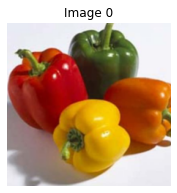

In [143]:
interp.plot_top_losses(k=1)

We cannot use a simple confusion matrix for multi label classifications. But we can review the confusion matrix for each of the labels:

In [158]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
preds = np.argmax(interp.preds.cpu().detach().numpy(), axis=1 )
targs = np.argmax(interp.targs.cpu().detach().numpy(), axis=1)

In [164]:
mlcm = multilabel_confusion_matrix(targs, preds)
for i, mc in enumerate(mlcm): 
    print(f"Confusion matrix for '{learn.dls.vocab[i]}':")
    print(mc)

Confusion matrix for 'green':
[[2 0]
 [1 1]]
Confusion matrix for 'red':
[[3 0]
 [0 1]]
Confusion matrix for 'yellow':
[[2 1]
 [0 1]]


## Predict classes for new images

### One by one from images you upload

In [141]:
from fastai.vision.widgets import *

In [148]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
out_pl.clear_output()
lbl_pred = widgets.Label()

In [155]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn.predict(img)
    mgs_list = [f"'{learn.dls.vocab[int(pred)]}' with probability {prob:.04f}" for pred, prob in zip(preds, probs[pred_idx])]
    lbl_pred.value = '; '.join(mgs_list)
btn_run.on_click(on_click_classify)

In [151]:
VBox([widgets.Label('What bell pepper is it?'), 
      btn_upload, btn_run, out_pl, lbl_pred])

Clearly this classifier is not great, but we only gave it 20 images for 3 classes. 

Spending a little more time to build a bigger dataset, where the various classes are balanced, will give better results, undoubtedly.

### Several at a time base on a list of paths

Classes for this image:


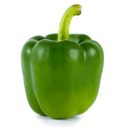

 - 'green' with probability 0.9885


Classes for this image:


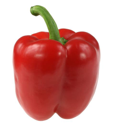

 - 'red' with probability 0.7948


Classes for this image:


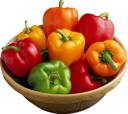

 - 'green' with probability 0.8689
 - 'red' with probability 0.5124
 - 'yellow' with probability 0.6377




In [156]:
img_list = ['/content/gdrive/MyDrive/Datasets/peppers/017_cca229d7.jpg', 
            '/content/gdrive/MyDrive/Datasets/peppers/014_2cdc7d91.jpg',  
            '/content/gdrive/MyDrive/Datasets/peppers/005_d9c8c3d2.jpg']

for fn in img_list:
    p2img = Path(fn)
    img = PILImage.create(p2img)
    print('Classes for this image:')
    display(img.to_thumb(128,128))
    preds, pred_idx, probs = learn.predict(fn)
    print('\n'.join([f" - '{pred}' with probability {prob:.04f}" for pred, prob in zip(preds, probs[pred_idx])]))
    print('\n')